In [76]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [77]:
# 1. Load the dataset

data = pd.read_csv('heart_attack_dataset.csv')
dataset = np.array(data)

m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

# la columna (Heart Attack Risk) que contiene los resultados, es la última columna del dataset

x = dataset[:, 0:-1]
y = dataset[:, -1]
y = y.reshape(-1, 1)

print('x:', np.shape(x))
print('y:', np.shape(y))

Rows: 8763 Columns: 23
x: (8763, 22)
y: (8763, 1)


In [78]:
# 2. Normalize the data
def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / np.std(x,axis=0)
    return x_norm

X_norm = normalize(x)

In [79]:
#3. Prepare data: add Bias
def Bias(X):
    ones = np.ones((len(X),1))
    X1 = np.concatenate((ones, X), axis=1)
    return X1

x = Bias(X_norm)

print('x shape: ', np.shape(x))

x shape:  (8763, 23)


In [80]:
# 4. Split the data into training and testing sets

test_size = 0.3
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size, random_state=0)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))

Split X 8763 rows into train with 6134 and test with 2629
Split Y 8763 rows into train with 6134 and test with 2629
xTrain shape: (6134, 23) yTrain shape: (6134, 1)
xTest shape: (2629, 23) yTest shape: (2629, 1)


In [81]:
# 5. Primer algoritmo de clasificación: Regresión Logística con libreria sklearn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
LR = model.fit(xTrain, yTrain.ravel())

LR_train_score = LR.score(xTrain, yTrain)
LR_test_score = LR.score(xTest, yTest)

print('Train score:', LR_train_score)
print('Test score:', LR_test_score)


Train score: 0.6432996413433323
Test score: 0.6382655001901864


In [82]:
# 6. Implementar R2 como medicion de desempeño
from sklearn.metrics import r2_score

R2_train = []
R2_test = []

R2_train.append(LR_train_score)
R2_test.append(LR_test_score)

print(R2_train, R2_test)

[0.6432996413433323] [0.6382655001901864]


In [83]:
# 7. Segundo algoritmo usando Decision Tree Classifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# llamar al constructor del de decision
tree_model = DecisionTreeClassifier()

# Entrenar el modelo
tree_model = tree_model.fit(xTrain, yTrain)

In [84]:
# 8. Obtener R2 del DT

costDT_tr = tree_model.score(xTrain, yTrain)
costDT_te = tree_model.score(xTest, yTest)

R2_train.append(costDT_tr)
R2_test.append(costDT_te)

print(R2_train, R2_test)

[0.6432996413433323, 1.0] [0.6382655001901864, 0.5458349182198554]


In [85]:
# 9. Tercer algoritmo usando Perceptron con libreria sklearn

from sklearn.linear_model import Perceptron

model = Perceptron()
perceptron = model.fit(xTrain, yTrain.ravel())

perceptron_train_score = perceptron.score(xTrain, yTrain)
perceptron_test_score = perceptron.score(xTest, yTest)

print('Train score:', perceptron_train_score)
print('Test score:', perceptron_test_score)

Train score: 0.5784153896315618
Test score: 0.5751236211487257


In [86]:
# 10. Guardar R2 del Perceptron

R2_train.append(perceptron_train_score)
R2_test.append(perceptron_test_score)

print(R2_train, R2_test)

[0.6432996413433323, 1.0, 0.5784153896315618] [0.6382655001901864, 0.5458349182198554, 0.5751236211487257]


In [87]:
# 11. Cuarto algoritmo con Random Forest Classifier con libreria sklearn

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
RFC = model.fit(xTrain, yTrain.ravel())

RFC_train_score = RFC.score(xTrain, yTrain)
RFC_test_score = RFC.score(xTest, yTest)

In [88]:
# 12. Guardar R2 del modelo de Random Forest

R2_train.append(RFC_train_score)
R2_test.append(RFC_test_score)

print(R2_train, R2_test)

[0.6432996413433323, 1.0, 0.5784153896315618, 1.0] [0.6382655001901864, 0.5458349182198554, 0.5751236211487257, 0.6363636363636364]


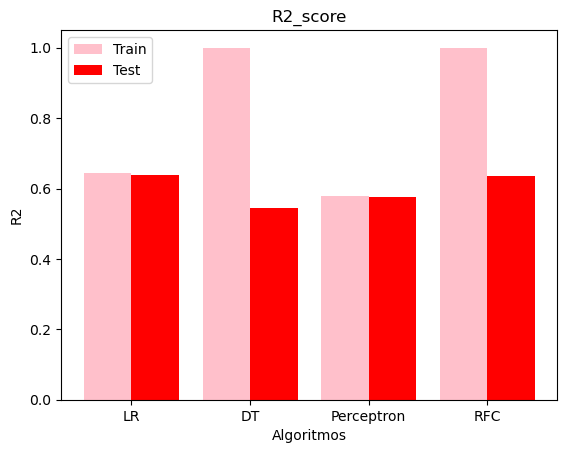

In [89]:
# 14. Comparar los resultados de los 4 algoritmos

XX = ['LR', 'DT', 'Perceptron', 'RFC']
X_axis = np.arange(len(XX))
#print(X_axis)

plt.bar(X_axis - 0.2, R2_train, 0.4, label = 'Train', color = 'pink')
plt.bar(X_axis + 0.2, R2_test, 0.4, label = 'Test', color = 'red')

plt.xticks(X_axis, XX)
plt.xlabel("Algoritmos")
plt.ylabel("R2")
plt.title("R2_score")
plt.legend()
plt.show()